# **Modelo de detección de cáncer cervical en muestras de tejido celular utilizando Máquinas de Soporte Vectorial:** Monografía presentada​ para optar al título de ​Especialista en Analítica y Ciencia de Datos​

**Estudiantes:** <br>
Daniel Alberto López Sánchez, Ing Electrónico. e-mail: daniel.lopez6@udea.edu.co <br>
July Andrea Muñoz Lopera, Ing Industrial. e-mail: july.munoz@udea.edu.co

**Asesora:** <br>
Maria Bernarda Salazar Sánchez, PhD. e-mail: bernarda.salazar@udea.edu.co

<br>
Universidad de Antioquia <br>
​Facultad de Ingeniería​ <br>
​​Especialización en Analítica y Ciencia de Datos​ <br>
​​Medellín, Antioquia, Colombia​ <br>
2023

# Objetivo
---
El objetivo de este notebook es realizar el preprocesamiento de los datos obtenidos en el notebook "Análisis de Distribución de Datos", encontrando la mejor representación posible de datos que maximiza la separación entre las diferentes clases. 

# Descarga de Característica Documento CSV
---
En el notebook previo, se realizó el filtrado de los atípicos del dataset de características extraídas, Para la descarga del repositorio, se usa el comando ```git clone https://github.com/Alberto-San/MonografiaDataScience```. El dataset filtrado se encuentra en la ruta ```MonografiaDataScience/tmp/filtered_data.csv```

In [1]:
!git clone https://github.com/Alberto-San/MonografiaDataScience

Cloning into 'MonografiaDataScience'...
remote: Enumerating objects: 175, done.
remote: Counting objects: 100% (175/175), done.
remote: Compressing objects: 100% (122/122), done.
remote: Total 175 (delta 67), reused 144 (delta 42), pack-reused 0
Receiving objects: 100% (175/175), 22.51 MiB | 9.61 MiB/s, done.
Resolving deltas: 100% (67/67), done.


Leyendo el archivo csv

In [2]:
import pandas as pd 

path = "MonografiaDataScience/tmp/filtered_data.csv"
filtered_data = pd.read_csv(path)
filtered_data

,class,image_path,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,...,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21
0,im_Superficial-Intermediate,/content/sipakmed/im_Superficial-Intermediate/...,183.323388,0.018020,0.028836,-917.959535,6.254622,20.068231,184.0,139.200186,...,23.040231,139.0,72.627459,0.013979,0.021424,5595.144120,6.293955,22.126087,67.0,124.324153
1,im_Superficial-Intermediate,/content/sipakmed/im_Superficial-Intermediate/...,186.047686,0.023454,0.079213,16033.627130,6.776816,39.819733,179.0,148.752417,...,41.342971,141.0,185.230083,0.021922,0.083143,-30604.651207,6.762042,34.669430,198.0,163.911240
2,im_Superficial-Intermediate,/content/sipakmed/im_Superficial-Intermediate/...,178.068636,0.022947,0.045504,-7910.307876,6.431249,24.560752,178.0,155.596777,...,26.812060,153.0,157.221446,0.019700,0.070152,-8125.133171,6.636741,30.095384,155.0,158.644256
3,im_Superficial-Intermediate,/content/sipakmed/im_Superficial-Intermediate/...,190.379236,0.029844,0.057215,-4221.604000,6.234412,20.254164,189.0,156.144607,...,18.226508,156.0,232.297087,0.025277,0.024731,-5571.572892,4.327503,10.288443,234.0,182.817624
4,im_Superficial-Intermediate,/content/sipakmed/im_Superficial-Intermediate/...,184.511240,0.024703,0.027122,-1554.618361,6.038195,17.793677,182.0,143.531488,...,22.069638,139.0,75.662645,0.018575,0.017502,1176.697080,5.739558,14.429489,72.0,127.906033
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3839,im_Koilocytotic,/content/sipakmed/im_Koilocytotic/im_Koilocyto...,175.074277,0.008603,0.061783,-3173.779717,6.880100,30.633768,179.0,157.764194,...,41.544311,164.0,149.685950,0.007820,0.061631,-8291.064711,6.876288,30.824130,155.0,157.322624
3840,im_Koilocytotic,/content/sipakmed/im_Koilocytotic/im_Koilocyto...,153.119070,0.008760,0.023177,30218.789883,7.161531,44.634528,148.0,131.797934,...,50.459878,124.0,116.790971,0.007939,0.032149,44807.749176,7.110522,43.822961,108.0,129.744401
3841,im_Koilocytotic,/content/sipakmed/im_Koilocytotic/im_Koilocyto...,106.992107,0.008553,0.039428,53835.382760,7.053690,41.447707,94.0,134.266570,...,58.186251,116.0,114.638657,0.008171,0.070147,168772.638679,7.101753,56.548571,93.0,125.291756
3842,im_Koilocytotic,/content/sipakmed/im_Koilocytotic/im_Koilocyto...,111.661777,0.007846,0.027666,10323.250029,6.414168,24.813317,104.0,90.348120,...,28.378870,82.0,124.020289,0.007445,0.050579,5653.609055,6.662602,28.633825,119.0,102.844773


Diviendo el dataset en datos de entrenamiento y testeo, conservando el desbalance de cada clase

In [3]:
# Eliminando la columna image_path
dataset = filtered_data.drop("image_path", axis=1)

# Obteniendo los descriptores y las etiquetas
features, vector_label = dataset.drop("class", axis=1), dataset["class"] 

# Convirtiendo las etiquetas de string a numeros
vector_numeric_label_dic = pd.factorize(vector_label)
vector_numeric_label = vector_numeric_label_dic[0]
vector_numeric_label_index = vector_numeric_label_dic[1]

In [4]:
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
features_train, features_test, vector_label_train, vector_label_test = train_test_split(
      features, vector_numeric_label, 
      test_size=0.2, 
      random_state=0, 
      stratify=vector_numeric_label
    )

# Escalamiento de Datos
La escala de los datos es importante en el aprendizaje automático porque muchos algoritmos asumen que todas las características tienen la misma escala o peso. Si las características tienen diferentes escalas, algunos algoritmos pueden ser sesgados hacia las características con valores más altos. Escalar los datos para los algoritmos de aprendizaje automatico puede mejorar significativamente el rendimiento del modelo, ya que ayuda a igualar el peso de las características y a mejorar la precisión de la distancia euclidiana. 

En esta sección, se escalan los datos usando escalador robusto, estándar y min-max. Se analiza en las siguientes secciones el efecto que tiene escalar los datos y de no escalarlos.

In [5]:
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

# instanciating scalers objects
std_scaler = StandardScaler()
rob_scaler = RobustScaler()
mm_scaler = MinMaxScaler()


# scale the data using scalers
feature_hash = {}
feature_hash["features_std_scaled"] = {"data": std_scaler.fit_transform(features_train)}
feature_hash["features_rob_scaled"] = {"data": rob_scaler.fit_transform(features_train)}
feature_hash["features_mm_scaled"] = {"data": mm_scaler.fit_transform(features_train)}
feature_hash["features_no_scaled"] = {"data": features_train}

# Reducción de dimensionalidad de datos
La reducción de la dimensionalidad de los datos es importante en el aprendizaje automático porque puede mejorar el rendimiento de los modelos, reducir el tiempo de entrenamiento y la complejidad del modelo y ayudar a evitar el sobreajuste. Cuando los datos tienen muchas características o dimensiones, los modelos de aprendizaje automático pueden enfrentar problemas como la maldición de la dimensionalidad, que se refiere a la dificultad de analizar y procesar datos con muchas características. Además, los datos con muchas dimensiones pueden requerir más tiempo y recursos para entrenar, lo que puede hacer que el proceso de aprendizaje sea más lento y costoso.

En esta sección se usarán los métodos de reducción de dimensionalidad de Análisis de Componentes Principales (PCA), Análisis de Componentes Independientes (ICA), y Análisis de Discriminante Lineal (LDA).

# Análisis de Componentes Principales
PCA es una técnica de reducción de dimensionalidad que transforma un conjunto de variables correlacionadas en un conjunto de variables no correlacionadas llamadas componentes principales. Esto se logra encontrando la dirección de máxima varianza en los datos y proyectando los datos en esa dirección. Los componentes principales se ordenan en función de su varianza, de modo que los primeros componentes principales capturan la mayor cantidad de variabilidad en los datos. PCA se utiliza comúnmente para la visualización de datos, la compresión de imágenes y la eliminación de ruido en los datos.

# Análisis de Componentes Independientes
El algoritmo ICA (Análisis de Componentes Independientes) es una técnica de separación de señales que descompone un conjunto de señales mezcladas en un conjunto de señales independientes, asumiendo que las señales originales son estadísticamente independientes entre sí. ICA encuentra una matriz de mezcla que describe cómo las señales originales se combinan para formar las señales mezcladas observadas. Luego, utiliza esta matriz para recuperar las señales originales mediante la inversión de la matriz de mezcla. ICA se utiliza comúnmente en la eliminación de ruido de señales, la separación de fuentes en mezclas de audio y la detección de señales en imágenes médicas.

# Análisis de Discriminante Lineal 
El algoritmo LDA (Análisis Discriminante Lineal) es una técnica de reducción de dimensionalidad que transforma un conjunto de datos de alta dimensionalidad en un conjunto de datos de baja dimensionalidad, manteniendo al mismo tiempo la mayor cantidad posible de información discriminante para clasificar los datos en diferentes categorías. LDA encuentra la dirección de proyección que maximiza la separación entre las categorías y minimiza la varianza dentro de cada categoría. Luego, utiliza esta dirección para proyectar los datos originales en un espacio de menor dimensión. 

# Criterio de la varianza para encontrar el número de componentes óptimo
El criterio de la varianza es una técnica utilizada para seleccionar el número óptimo de componentes en diferentes métodos de reducción de dimensionalidad. El criterio de la varianza sugiere que se debe seleccionar el número de componentes que expliquen la mayor cantidad posible de la varianza en los datos originales. La idea es que si se mantienen demasiadas componentes, se puede incluir ruido y reducir la capacidad del modelo para generalizar a nuevos datos. Por otro lado, si se mantienen muy pocas componentes, se puede perder información importante.

# Selección de la mejor representación de reducción de dimensionalidad
Para seleccionar el mejor algoritmo que reduce la dimensionalidad del dataset, se hace uso de una Máquina de Soporte Vectorial (SVM) y se entrena para cada representación de los datos con diferentes metodos de escalamiento con diferentes metodos de reduccion de dimensionalidad. Usamos como métrica el accuracy para en train y test para definir cuál es la mejor representación de los datos. Se escoge la máquina de soporte vectorial debido a que es el clasificador que se repora en el articulo **SIPAKMED: A NEW DATASET FOR FEATURE AND IMAGE BASED CLASSIFICATION OF NORMAL AND PATHOLOGICAL CERVICAL CELLS IN PAP SMEAR IMAGES**, el cual representa el baseline sobre el cual se compara los resultados

Procesamiento de los datos con PCA

In [6]:
from sklearn.decomposition import PCA
import numpy as np

def find_optimal_pca_components(X):
  # Setear PCA
  pca = PCA(random_state=0).fit(X)

  # Obtener eigenvalores y eigenvectores
  eigenvalues = pca.explained_variance_
  eigenvectors = pca.components_

  # Calculo de la proporcion de la varianza por componente
  variance_ratio = pca.explained_variance_ratio_

  # Calculo cumulativo de la varianza
  cumulative_variance_ratio = np.cumsum(variance_ratio) / np.sum(variance_ratio)

  # Seleccion de las componentes que cuentan con el 90% o mas de varianza
  num_components = np.argmax(cumulative_variance_ratio >= 0.9) + 1
  return num_components

# Iteracion sobre cada una de las representaciones de los datos con los diferentes escaladores
for key in list(feature_hash.keys()):
  features = feature_hash[key]["data"] # Caracteristicas con el escalador "key"
  optimal_components = find_optimal_pca_components(features)
  print("optimal_components: {}".format(optimal_components))
  pca = PCA(random_state=45, n_components=optimal_components)
  data_pca = pca.fit_transform(features)
  feature_hash[key]["pca"] = {
      "data": data_pca,
      "model": pca
  }

optimal_components: 7
optimal_components: 7
optimal_components: 5
optimal_components: 2


Procesamiento de los datos con ICA

In [7]:
from sklearn.decomposition import FastICA
import numpy as np

def find_optimal_components(X):

    # Seteo del algoritmo ICA
    ica = FastICA(random_state=0)
    ica.fit(X)

    # Representacion de componentes independientes
    independent_components = ica.transform(X)

    # Calculo de la matriz de covarianza de las componentes independientes
    cov_components = np.cov(independent_components.T) 

    # Calculo de los eigenvectores y eigenvalores
    eigvals, eigvecs = np.linalg.eig(cov_components)

    # Calculo del porcentage de varianza de cada eigenvalor
    variance_explained = np.cumsum(eigvals) / np.sum(eigvals)
    
    # Seleccion del numero de componentes que explican el 90% de la varianza 
    num_components = np.sum(variance_explained <= 0.9) + 1

    return num_components if num_components > 1 else 2

# Iteracion sobre cada una de las representaciones de los datos con los diferentes escaladores
for key in list(feature_hash.keys()):
  features = feature_hash[key]["data"] # Caracteristicas con el escalador "key"
  ica_optimal_components = find_optimal_components(features)
  print("ica_optimal_components: {}".format(ica_optimal_components))
  ica = FastICA(random_state=45, n_components=ica_optimal_components)
  data_ica = ica.fit_transform(features)
  feature_hash[key]["ica"] = {
      "data": data_ica,
      "model": ica
  }

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(


ica_optimal_components: 20


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(


ica_optimal_components: 20


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(


ica_optimal_components: 20


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(


ica_optimal_components: 20


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(


In [8]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

def get_optimal_lda_components(features, labels):
    # Setear LDA
    lda = LinearDiscriminantAnalysis()
    lda.fit(features, labels)

    # # Obtener eigenvalores
    var_ratio = lda.explained_variance_ratio_

    # Obtener representacion cumulativa
    cum_var_ratio = np.cumsum(var_ratio)

    # Componentes que representan al menos el 95% de la varianza original de datos
    num_components = np.argmax(cum_var_ratio >= 0.95) + 1
    return num_components

# Iteracion sobre cada una de las representaciones de los datos con los diferentes escaladores
for key in list(feature_hash.keys()):
  features = feature_hash[key]["data"] # Caracteristicas con el escalador "key"
  lda_optimal_components = get_optimal_lda_components(features, vector_label_train)
  print("optimal_components for {} scaler method: {}".format(key, lda_optimal_components))
  lda = LinearDiscriminantAnalysis(n_components=lda_optimal_components)
  data_lda = lda.fit_transform(features, vector_label_train)
  feature_hash[key]["lda"] = {
      "data": data_lda,
      "model": lda
  }

optimal_components for features_std_scaled scaler method: 4
optimal_components for features_rob_scaled scaler method: 4
optimal_components for features_mm_scaled scaler method: 4
optimal_components for features_no_scaled scaler method: 4


Una vez obtenidas las representaciones de los datos con los diferentes escaladores y algoritmos, se procede a verificar cuál es la mejor representación de datos basados en la clasificación obtenida por una máquina de soporte vectorial. 

In [9]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings("ignore")

def get_model_data(vector_label_train, y_pred):  
  # Calculo del accuracy
  accuracy = accuracy_score(vector_label_train, y_pred)

  # Calculo de la matriz de confusion
  conf_mat = confusion_matrix(vector_label_train, y_pred)

  return accuracy, conf_mat

def eval_performance(
      features_train, 
      features_test, 
      vector_label_train, 
      vector_label_test
    ):
  # Entrenamiento de la maquina de soporte vectorial
  clf = SVC()

  # Calculo cross validation con intencion de ver el performance real de entrenamiento
  y_pred = cross_val_predict(clf, features_train, vector_label_train, cv=5)

  # Metricas de entrenamiento
  accuracy_train, conf_mat_train = get_model_data(vector_label_train, y_pred)

  # Entrenamiento de algortimo de clasificacion
  clf.fit(features_train, vector_label_train)

  # Prediccion sobre data de test
  y_pred = clf.predict(features_test)

  # Metricas de testeo
  accuracy_test, conf_mat_test = get_model_data(vector_label_test, y_pred)

  return accuracy_train, conf_mat_train, accuracy_test, conf_mat_test 


rows = []

# Iteracion sobre cada uno de los metodos de escalamiento
for key in list(feature_hash.keys()):
  data_list = list(feature_hash[key].keys())

  # Iteracion sobre cada uno de los metodos de reduccion de dimensionalidad
  for key_data in data_list:

    # Chequeando la representacion de los datos originales sin escalar y sin reducir dimensionalidad
    if key_data == "data":
      accuracy_train, conf_mat_train, accuracy_test, conf_mat_test = eval_performance(
        features_train, 
        features_test, 
        vector_label_train, 
        vector_label_test
      )
    else:
      data = feature_hash[key][key_data]["data"]
      model = feature_hash[key][key_data]["model"]
      accuracy_train, conf_mat_train, accuracy_test, conf_mat_test = eval_performance(
        data, 
        model.transform(features_test), 
        vector_label_train, 
        vector_label_test
      )
    rows.append([key, key_data, accuracy_train, conf_mat_train, accuracy_test, conf_mat_test])

df_summary = pd.DataFrame(rows, columns =["scaler", "dim reduction method", "accuracy_train", "conf_mat_train", "accuracy_test", "conf_mat_test"])


In [10]:
df_summary.sort_values(by=["accuracy_train", "accuracy_test"], ascending=False)

,scaler,dim reduction method,accuracy_train,conf_mat_train,accuracy_test,conf_mat_test
6,features_rob_scaled,ica,0.950244,"[[615, 3, 0, 5, 8], [0, 597, 2, 0, 19], [1, 4,...",0.200260,"[[0, 158, 0, 0, 0], [0, 154, 0, 0, 0], [0, 149..."
2,features_std_scaled,ica,0.949919,"[[615, 3, 0, 5, 8], [0, 597, 2, 0, 19], [1, 4,...",0.200260,"[[0, 158, 0, 0, 0], [0, 154, 0, 0, 0], [0, 149..."
10,features_mm_scaled,ica,0.949268,"[[615, 3, 0, 5, 8], [0, 595, 2, 0, 21], [1, 4,...",0.200260,"[[0, 158, 0, 0, 0], [0, 154, 0, 0, 0], [0, 149..."
14,features_no_scaled,ica,0.947967,"[[616, 4, 0, 5, 6], [0, 597, 2, 0, 19], [2, 6,...",0.937581,"[[156, 0, 0, 1, 1], [0, 143, 1, 1, 9], [0, 1, ..."
15,features_no_scaled,lda,0.903740,"[[613, 0, 6, 8, 4], [0, 576, 3, 1, 38], [6, 10...",0.889467,"[[150, 0, 2, 5, 1], [1, 140, 1, 0, 12], [2, 2,..."
3,features_std_scaled,lda,0.903740,"[[613, 0, 6, 8, 4], [0, 576, 3, 1, 38], [6, 10...",0.205462,"[[158, 0, 0, 0, 0], [154, 0, 0, 0, 0], [149, 0..."
7,features_rob_scaled,lda,0.903740,"[[613, 0, 6, 8, 4], [0, 576, 3, 1, 38], [6, 10...",0.205462,"[[158, 0, 0, 0, 0], [154, 0, 0, 0, 0], [149, 0..."
11,features_mm_scaled,lda,0.903740,"[[613, 0, 6, 8, 4], [0, 576, 3, 1, 38], [6, 10...",0.205462,"[[158, 0, 0, 0, 0], [154, 0, 0, 0, 0], [149, 0..."
1,features_std_scaled,pca,0.893333,"[[612, 0, 6, 7, 6], [0, 584, 7, 0, 27], [4, 18...",0.200260,"[[0, 158, 0, 0, 0], [0, 154, 0, 0, 0], [0, 149..."
9,features_mm_scaled,pca,0.882276,"[[608, 0, 7, 11, 5], [0, 574, 6, 0, 38], [5, 1...",0.205462,"[[158, 0, 0, 0, 0], [154, 0, 0, 0, 0], [149, 0..."


Se puede observar en la tabla anterior cómo los algoritmos ICA y LDA son los que presentan mejor accuracy en el entrenamiento, mientras que ICA es el que mejor accuracy presenta en la prueba cuando los datos no son escalados.

Para entender mejor los resultados, también se incluyen gráficos t-sne original y de los datos reducidos en su dimensionalidad. En particular, se puede observar una representación de los datos originales en t-SNE por clase, lo que permite visualizar cómo se agrupan los datos. Además, se puede observar una representación de los datos sin escalar utilizando ICA, lo que permite comparar la representación de los datos antes y después de la reducción de dimensionalidad.

In [11]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# cargar los dataframes
df_original = feature_hash["features_no_scaled"]["data"]
df_dim_red = feature_hash["features_no_scaled"]["ica"]["data"]

# aplicar t-SNE para reducir la dimensionalidad a 2 dimensiones
X_tsne_original = TSNE(n_components=2, random_state=0).fit_transform(df_original)
X_tsne_red_dim = TSNE(n_components=2, random_state=0).fit_transform(df_dim_red)

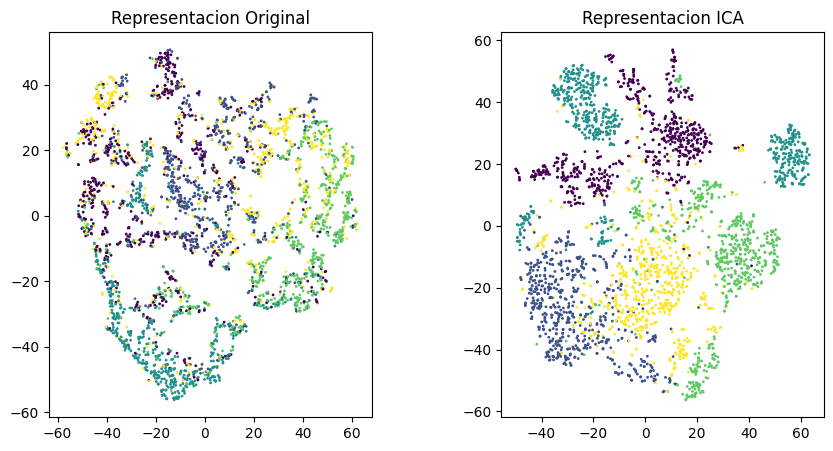

In [12]:
# Creando los dos plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Plot t sne datos original
scatter1 = ax1.scatter(X_tsne_original[:, 0], X_tsne_original[:, 1], c=vector_label_train, s=1)
ax1.set_title('Representacion Original')

# Plot t sne datos reduccion de dimensionalidad
scatter2 = ax2.scatter(X_tsne_red_dim[:, 0], X_tsne_red_dim[:, 1], c=vector_label_train, s=1)
ax2.set_title('Representacion ICA')

# Concatenar plots
fig.subplots_adjust(wspace=0.4)
plt.show()

En el gráfico anterior se puede observar claramente que el uso de ICA logra una separación significativa entre las diferentes clases en comparación con la representación original. Esto demuestra la eficacia de la técnica de reducción de dimensionalidad en la mejora de la capacidad de representar los datos

El mejor preprocesamiento que maximiza los resultados de una Máquina de Soporte Vectorial (SVM) es el de Análisis de Componentes Independientes (ICA) aplicado sobre los datos originales. Se materializa el modelo ICA y se guarda de manera **manual** en el repositorio MonografiaDataScience, debido a que colab no puede hacer push directo a github

In [15]:
from joblib import dump

# Guardando el modelo ICA
ica_model = feature_hash["features_no_scaled"]["ica"]["model"]

# Guardando modelo
dump(ica_model, 'ica_model.joblib')

['ica_model.joblib']